1. import the dataset

In [1]:
import boto3
import pandas as pd
from io import StringIO

# AWS S3 configuration
bucket_name = 'spoofing-ml-exp'
object_key = 'Ship Info/EDA_final.csv'  # Replace with actual file name

# Create an S3 client
s3 = boto3.client('s3')

# Download the file content as string
csv_obj = s3.get_object(Bucket=bucket_name, Key=object_key)
csv_string = csv_obj['Body'].read().decode('utf-8')

# Load into DataFrame
df = pd.read_csv(StringIO(csv_string))

# Show the first few rows
df.head()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,receivedtimestamp,mmsi,speed,course,latitude,longitude,vessel_type
0,2023-12-16 20:27:38,309759000,0.0,344.8,31.42835,121.47638,Bulk Carrier
1,2023-12-04 23:20:55,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier
2,2023-12-15 23:58:09,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier
3,2023-12-09 04:12:28,309759000,0.0,197.4,37.49580,126.61050,Bulk Carrier
4,2023-12-13 15:54:05,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier


In [2]:
import pandas as pd

# Assuming your DataFrame is named df
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'], errors='coerce')

In [3]:
df['mmsi'] = df['mmsi'].astype('category')

2. understand the dataset

2.1. preview the fist few rows

In [4]:
df.head()

,receivedtimestamp,mmsi,speed,course,latitude,longitude,vessel_type
0,2023-12-16 20:27:38,309759000,0.0,344.8,31.42835,121.47638,Bulk Carrier
1,2023-12-04 23:20:55,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier
2,2023-12-15 23:58:09,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier
3,2023-12-09 04:12:28,309759000,0.0,197.4,37.49580,126.61050,Bulk Carrier
4,2023-12-13 15:54:05,309759000,0.0,0.0,0.00000,0.00000,Bulk Carrier


2.2. overview of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62721 entries, 0 to 62720
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   receivedtimestamp  62721 non-null  datetime64[ns]
 1   mmsi               62721 non-null  category      
 2   speed              62721 non-null  float64       
 3   course             62721 non-null  float64       
 4   latitude           62721 non-null  float64       
 5   longitude          62721 non-null  float64       
 6   vessel_type        62721 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(4), object(1)
memory usage: 2.9+ MB


* there are 62721 records and 7 columns
* none of the features have missing data
* there are one time related feature, two categorical features and 4 numerical features

3. descriptive statistics


3.1. for numerical columns

In [6]:
df[['speed', 'course', 'latitude', 'longitude']].describe()

,speed,course,latitude,longitude
count,62721.000000,62721.000000,62721.000000,62721.000000
mean,1.859644,170.544309,28.028620,61.374663
std,3.980471,116.921289,12.213789,48.005853
min,0.000000,0.000000,0.000000,-14.290073
25%,0.000000,58.700000,29.594921,29.603607
50%,0.000000,192.000000,29.599262,48.792880
75%,0.200000,247.000000,35.080250,126.610500
max,16.000000,360.000000,42.510708,134.415000


* count - number of non-null values
* mean - the average value
* std - how spread out the data
* min & max - smallest and largest value
* 25% , 50% and 75% - shows how the data distributed

3.2. for categorical columns

In [7]:
# value counts of the vessel types
df['vessel_type'].value_counts()

vessel_type
Crude Oil Tanker    27300
Products Tanker     15102
General Cargo        9012
Bulk Carrier         5773
Container            5534
Name: count, dtype: int64

In [8]:
#  value percentage of the vessel types
df['vessel_type'].value_counts(normalize=True) * 100

vessel_type
Crude Oil Tanker    43.526092
Products Tanker     24.078060
General Cargo       14.368393
Bulk Carrier         9.204254
Container            8.823201
Name: proportion, dtype: float64

4. univariate data visualization

4.1. histograms for numerical features

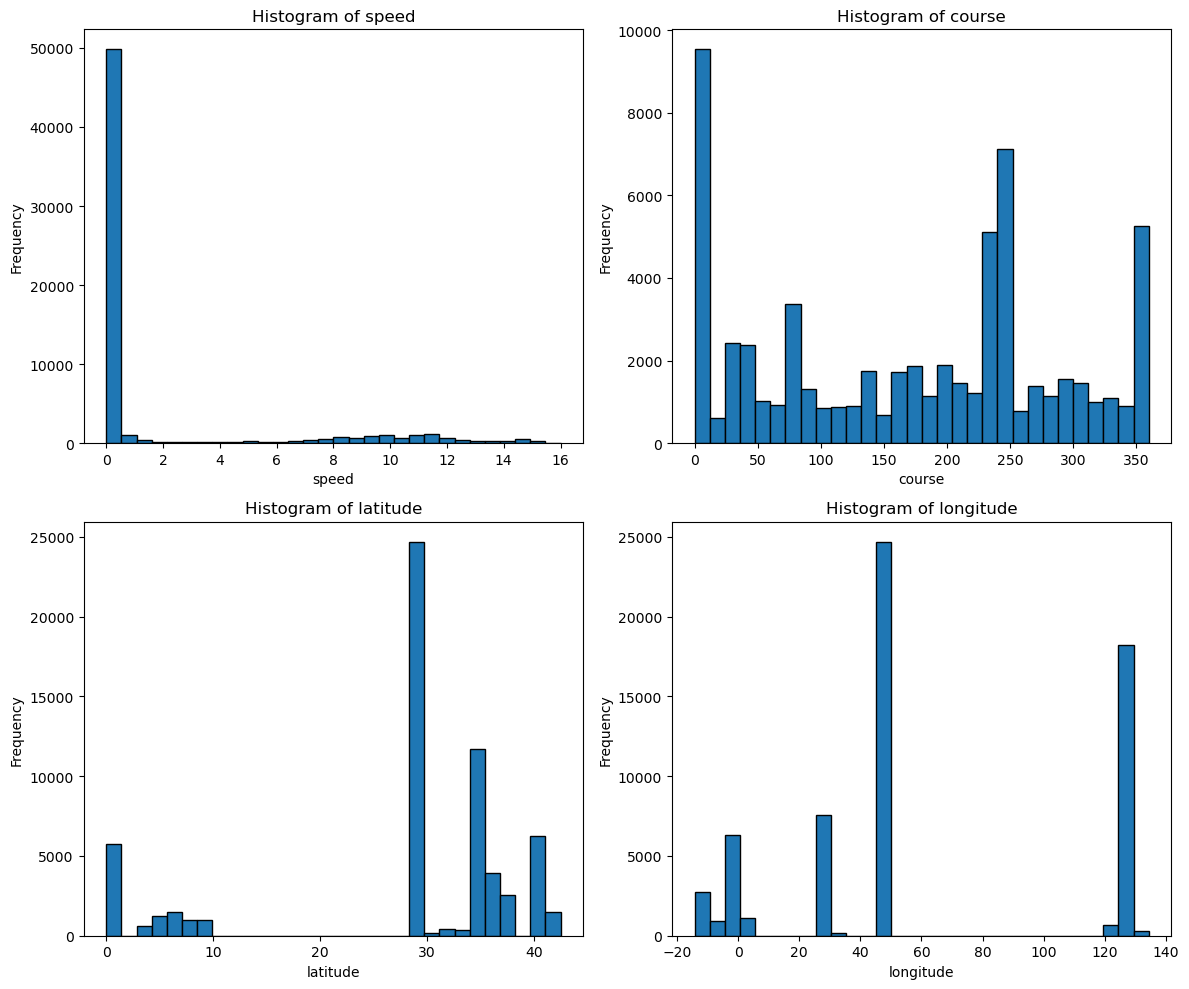

In [9]:
import matplotlib.pyplot as plt

# Define columns to plot
cols = ['speed', 'course', 'latitude', 'longitude']

# Set up subplots
plt.figure(figsize=(12, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


4.2. density plots for numerical features

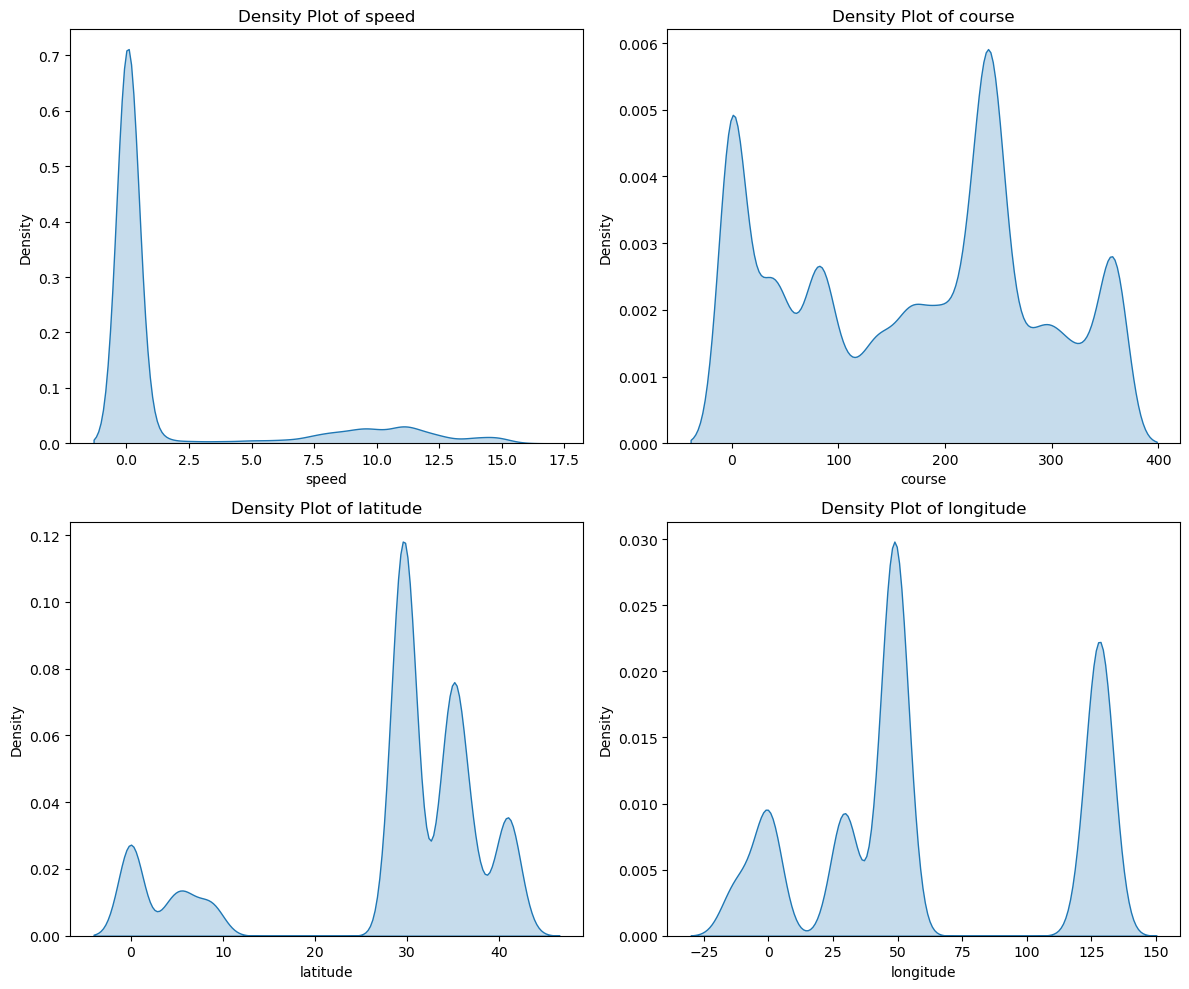

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns to plot
cols = ['speed', 'course', 'latitude', 'longitude']

# Set up subplots
plt.figure(figsize=(12, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


* Interpretation for speed
    * The plot has a peak near 0 speed, which means that most of the observations in the dataset have low speed values. As speed increases, the density decreases, indicating fewer observations at higher speeds
* Interpretation of course
    * peaks are around 50, 200 and 300
    * These peaks suggest that the "course" variable has clusters or concentrations of values near those points. In other words, values around 50, 200, and 300 occur more frequently in the dataset compared to other values.
    * that means vessel are travelling for those directions ( 50 refers to northeast, 200 refers to south-southeast, 300 refers to northwest)
* Interpretation of latitude
    * This suggests that the majority of the tracked activity or data points occurred near 30° latitude, with a smaller cluster near 5° latitude.
* Interpretation of longitude
    * The data is most concentrated around longitude 50, suggesting that a large number of activities occurred in that region.
    * A smaller but still significant cluster is present around longitude 125.

4.3. outliers of numerical features

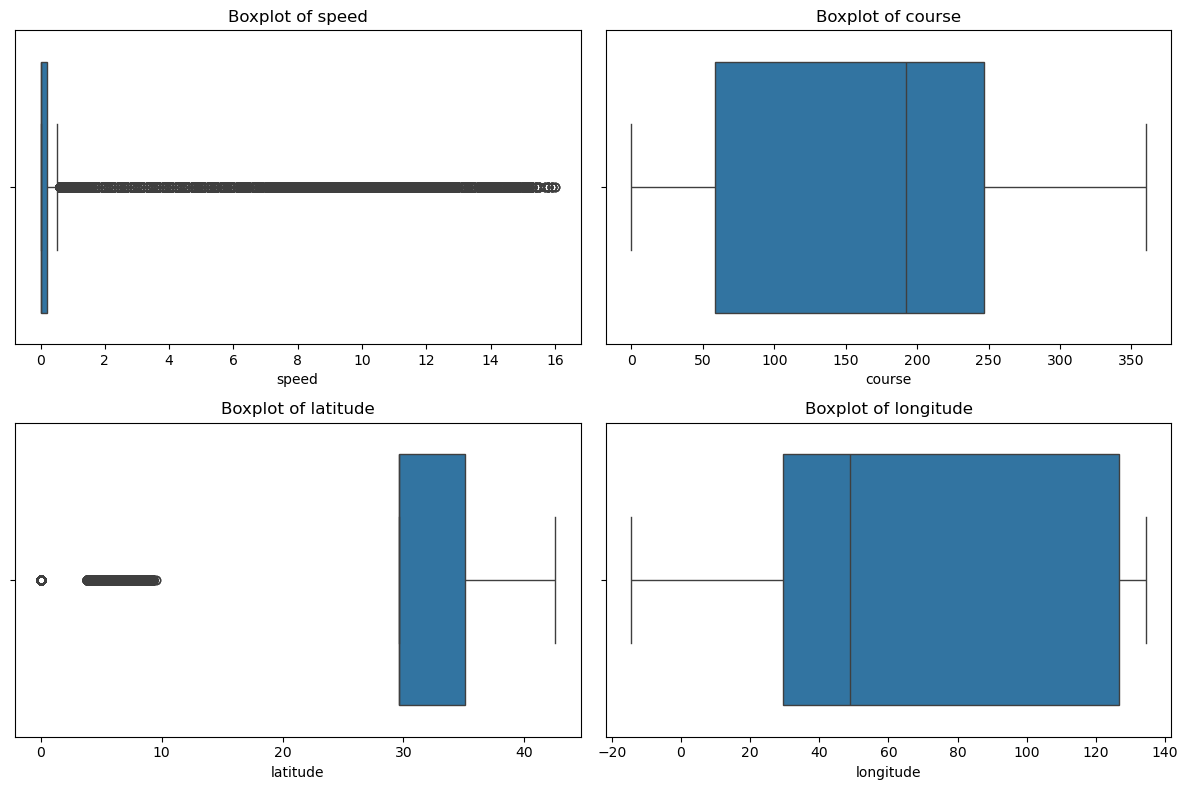

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
cols = ['speed', 'course', 'latitude', 'longitude']

# Set up subplots
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


4.4. distribution of vessel types

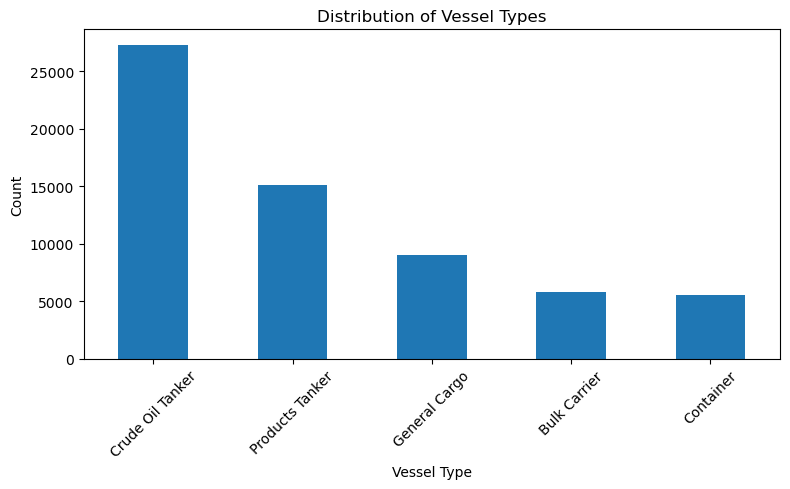

In [12]:
import matplotlib.pyplot as plt

# Count vessel types
vessel_counts = df['vessel_type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
vessel_counts.plot(kind='bar')

plt.title('Distribution of Vessel Types')
plt.xlabel('Vessel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. bivariate data visualization

5.1. vesseel type vs speed

5.1.1. compare both distribution and density of speed per vessel type.

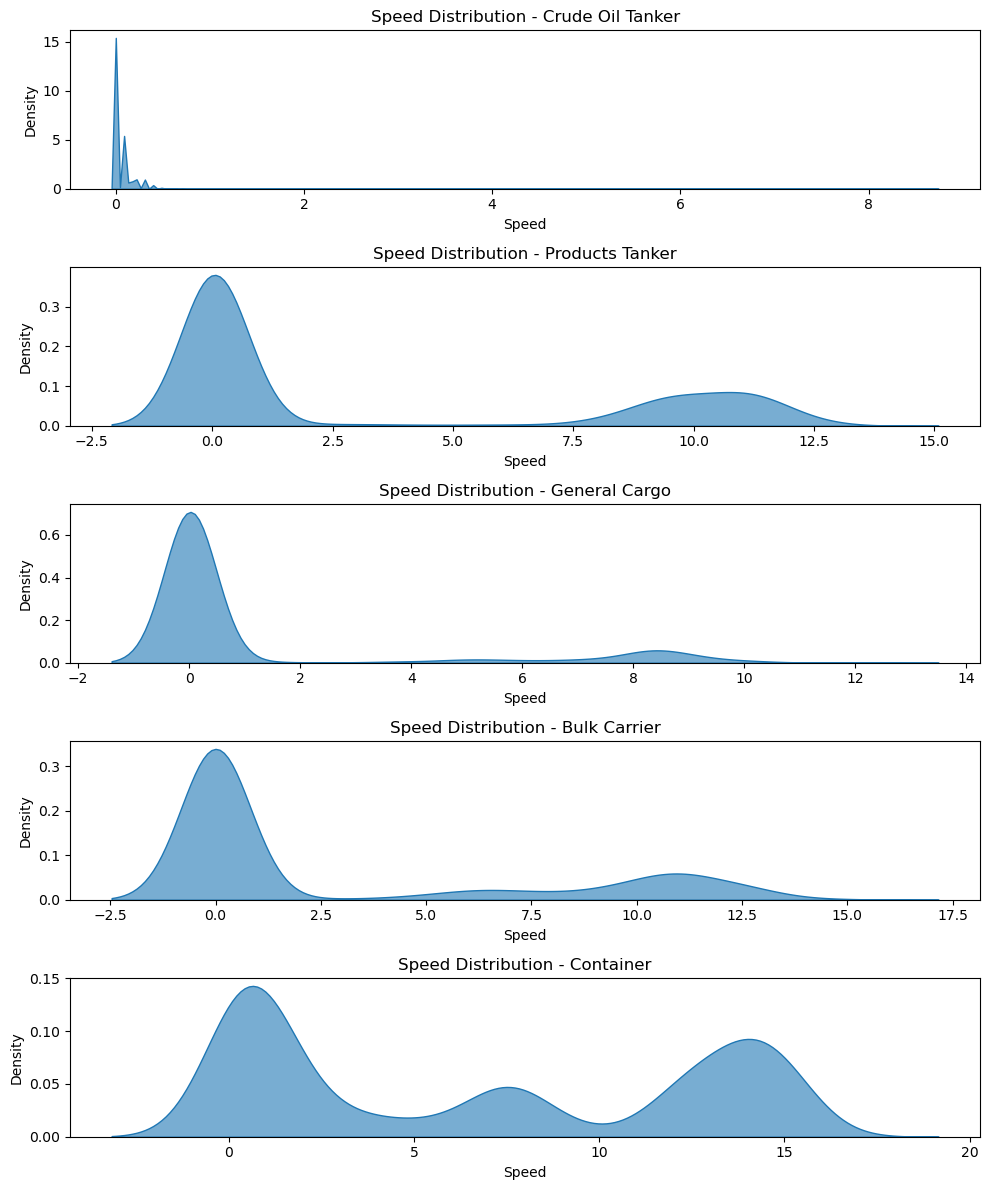

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get vessel type order (optional: sorted by frequency or name)
vessel_order = df['vessel_type'].value_counts().index.tolist()

# Create stacked subplots
plt.figure(figsize=(10, 12))

for i, vessel in enumerate(vessel_order, 1):
    plt.subplot(len(vessel_order), 1, i)
    sns.kdeplot(
        data=df[df['vessel_type'] == vessel],
        x='speed',
        fill=True,
        alpha=0.6
    )
    plt.title(f"Speed Distribution - {vessel}")
    plt.xlabel("Speed")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


* Taller peaks - more vessels travel at that speed
* narrow curve - most vessels have similar speed
* wide curve - vessel speeds are more variable
* multiple peaks - there are multiple common speed ranges

5.1.2. compare mean speed for each vessel type

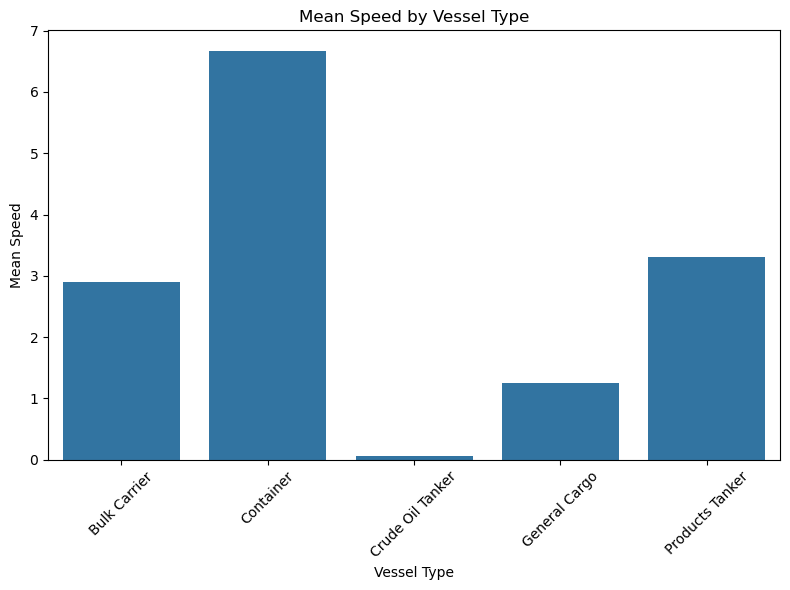

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean speed
mean_speed = df.groupby('vessel_type')['speed'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_speed, x='vessel_type', y='speed')

plt.title('Mean Speed by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Mean Speed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
mean_speed

,vessel_type,speed
0,Bulk Carrier,2.904157
1,Container,6.670094
2,Crude Oil Tanker,0.069267
3,General Cargo,1.247392
4,Products Tanker,3.299444


* Container vessels are the fastest, averaging 6.67 units, likely due to their role in time-sensitive cargo transport.
* Crude oil tankers are nearly stationary (0.07 units), possibly indicating anchoring or port activity.
* Products tankers and bulk carriers show moderate movement, suggesting regular but not high-speed operations.
* General cargo vessels are relatively slow, possibly due to shorter routes or more frequent stops.

5.2. vesseel type vs course

5.2.1. compare the distribution of course via each vessel type

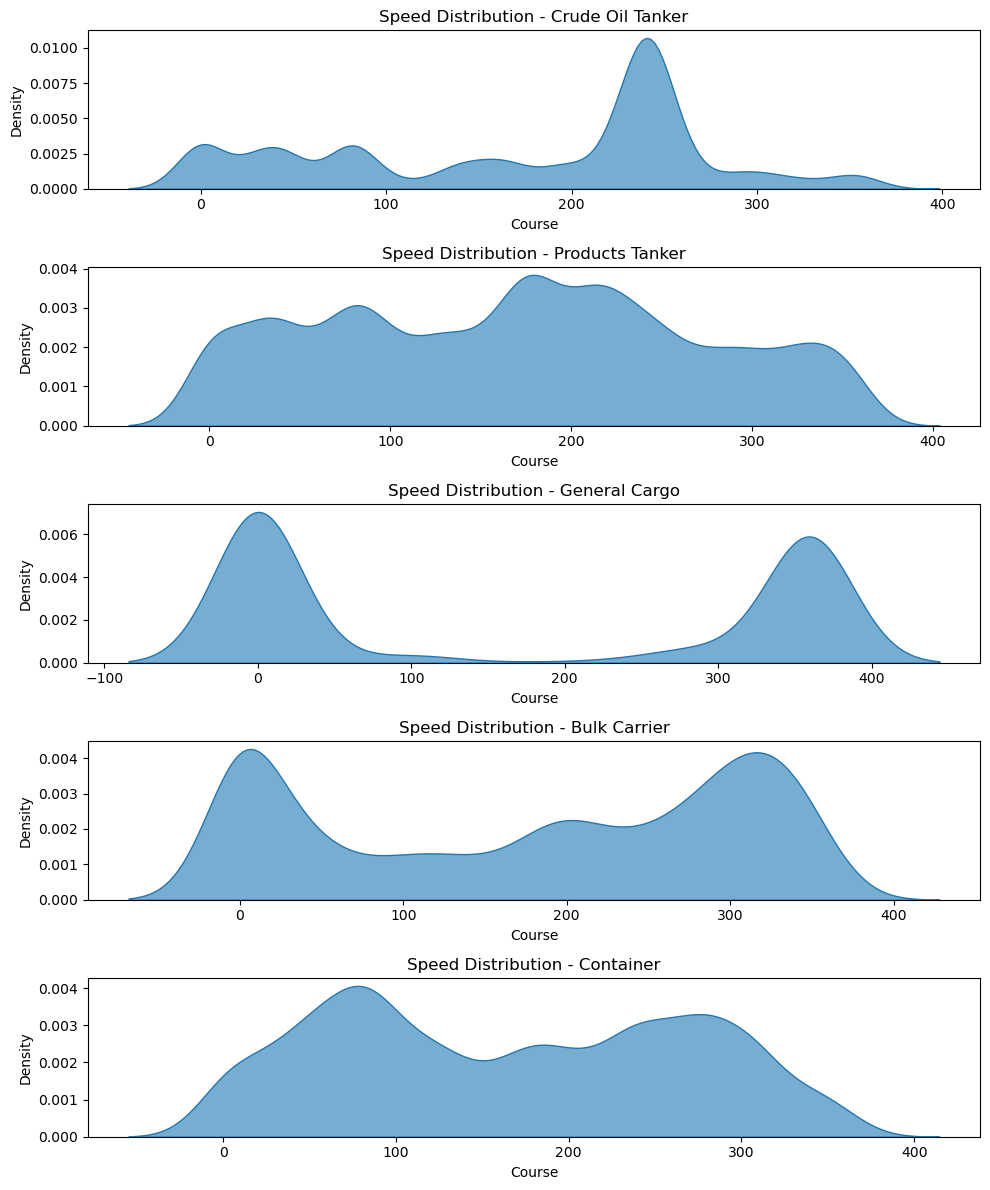

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get vessel type order (optional: sorted by frequency or name)
vessel_order = df['vessel_type'].value_counts().index.tolist()

# Create stacked subplots
plt.figure(figsize=(10, 12))

for i, vessel in enumerate(vessel_order, 1):
    plt.subplot(len(vessel_order), 1, i)
    sns.kdeplot(
        data=df[df['vessel_type'] == vessel],
        x='course',
        fill=True,
        alpha=0.6
    )
    plt.title(f"Speed Distribution - {vessel}")
    plt.xlabel("Course")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


5.2.2. compare the mean of course of vessels via each vessel type

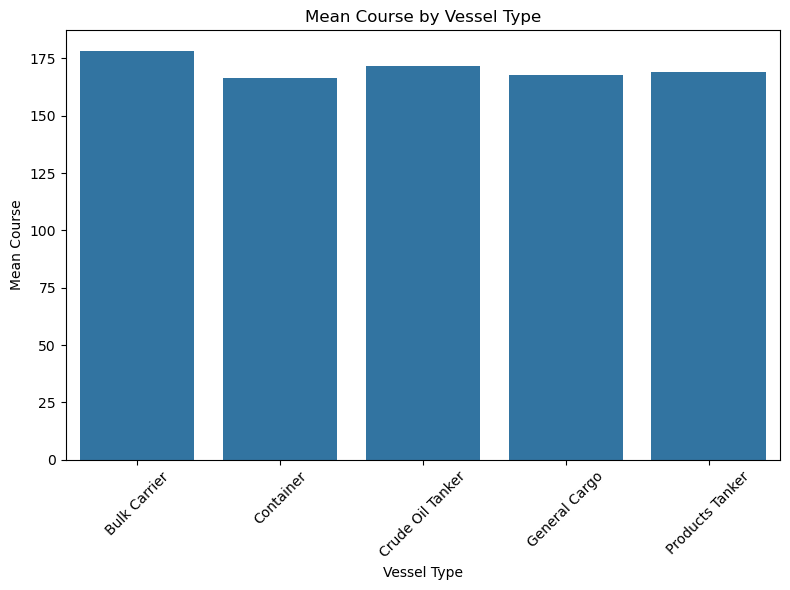

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean speed
mean_course = df.groupby('vessel_type')['course'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_course, x='vessel_type', y='course')

plt.title('Mean Course by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Mean Course')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
mean_course

,vessel_type,course
0,Bulk Carrier,178.303897
1,Container,166.416082
2,Crude Oil Tanker,171.548736
3,General Cargo,167.897648
4,Products Tanker,168.854489


* All vessel types have mean courses between ~166° and ~178°, indicating a general southward direction (since 180° is due south).

5.3. vessel type vs distance gap

In [25]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


In [26]:
# Sort by vessel and timestamp
df_sorted = df.sort_values(by=['mmsi', 'receivedtimestamp'])

# Shift coordinates within each vessel group
df_sorted['lat_prev'] = df_sorted.groupby('mmsi')['latitude'].shift(1)
df_sorted['lon_prev'] = df_sorted.groupby('mmsi')['longitude'].shift(1)

# Calculate distance gap
df_sorted['distgap'] = haversine(
    df_sorted['latitude'], df_sorted['longitude'],
    df_sorted['lat_prev'], df_sorted['lon_prev']
)


/tmp/ipykernel_6662/3896289854.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['lat_prev'] = df_sorted.groupby('mmsi')['latitude'].shift(1)
/tmp/ipykernel_6662/3896289854.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['lon_prev'] = df_sorted.groupby('mmsi')['longitude'].shift(1)


In [27]:
avg_distgap = df_sorted.groupby('vessel_type')['distgap'].mean().reset_index()

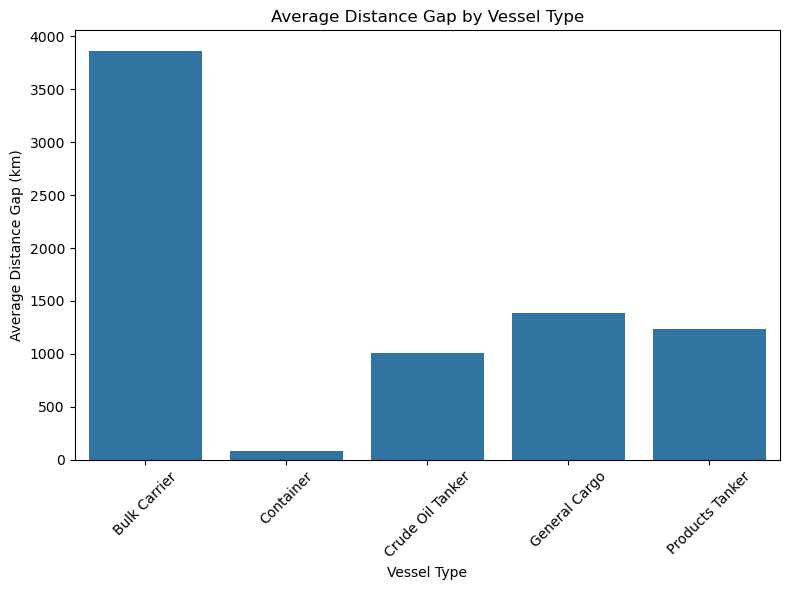

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_distgap, x='vessel_type', y='distgap')

plt.title('Average Distance Gap by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Average Distance Gap (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Bulk Carrier - Very large gaps; possibly due to infrequent tracking or long voyages between ports.
* General Cargo - Moderate gaps; suggests longer travel segments or less frequent data points.
* Products Tanker - Similar to general cargo; moderate tracking intervals.
* Crude Oil Tanker - Shorter gaps; more frequent tracking or shorter travel legs.
* Container - Very small gaps; indicates frequent tracking or shorter, more localized routes.

5.4. vessel type vs time gap

In [37]:
# Ensure timestamp is in datetime format
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])

# Sort by vessel and timestamp
df_sorted = df.sort_values(by=['mmsi', 'receivedtimestamp'])

# Calculate time gap (in seconds) between consecutive points per vessel
df_sorted['timegap'] = df_sorted.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()


/tmp/ipykernel_6662/176152794.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['timegap'] = df_sorted.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()


In [38]:
# Remove NaNs from the first time difference in each group
df_gap_avg = df_sorted.dropna(subset=['timegap'])

# Compute average time gap per vessel type
avg_timegap = df_gap_avg.groupby('vessel_type')['timegap'].mean().reset_index()


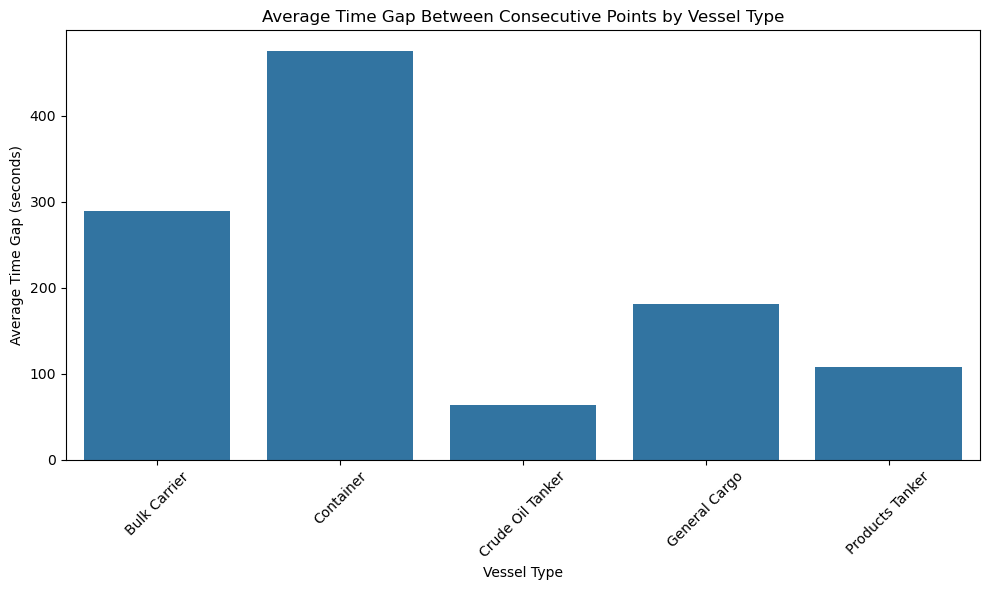

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_timegap, x='vessel_type', y='timegap')

plt.title('Average Time Gap Between Consecutive Points by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Average Time Gap (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Container - Longest time between data points; possibly due to less frequent tracking or longer intervals between updates.
* Bulk Carrier - Also relatively infrequent updates.
* General Cargo - Moderate tracking frequency.
* Products Tanker - More frequent updates.
* Crude Oil Tanker - Most frequently tracked

6. multivariate visualization

6.1. correlation analysis

              speed    course  latitude  longitude
speed      1.000000  0.059240 -0.072559   0.123758
course     0.059240  1.000000  0.364923   0.189630
latitude  -0.072559  0.364923  1.000000   0.632545
longitude  0.123758  0.189630  0.632545   1.000000


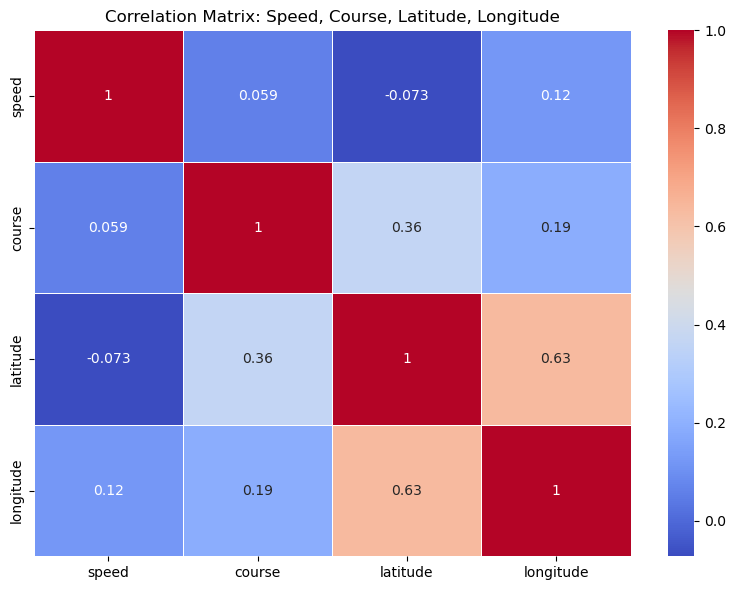

In [29]:
corr_data = df[['speed', 'course', 'latitude', 'longitude']]

correlation_matrix = corr_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Speed, Course, Latitude, Longitude')
plt.tight_layout()
plt.show()

* Speed & Course - Very weak positive correlation; speed and heading are mostly independent.
* Speed & Latitude - Very weak negative correlation; slight tendency for speed to decrease with latitude.
* Speed & Longitude - Weak positive correlation; speed slightly increases with longitude.
* Course & Latitude - Moderate positive correlation; heading tends to change with latitude.
* Course & Longitude - Weak positive correlation; heading slightly varies with longitude.
* Latitude & Longitude - Strong positive correlation; locations tend to move northeast or southwest together.

6.2. speed vs time vs vessel type

6.2.1. how the speed vary with time under vessel type

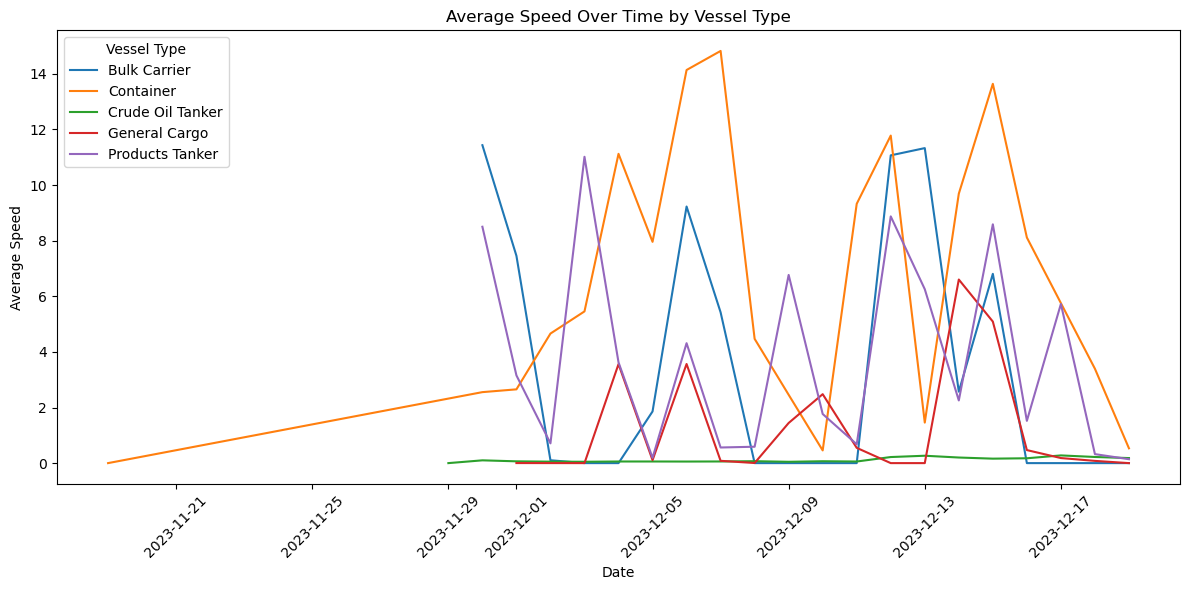

In [30]:
# First, make sure timestamp is datetime
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])

# Optional: aggregate by day or hour
df['date'] = df['receivedtimestamp'].dt.date

# Compute average speed per vessel type per day
avg_speed = df.groupby(['vessel_type', 'date'])['speed'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_speed, x='date', y='speed', hue='vessel_type')

plt.title('Average Speed Over Time by Vessel Type')
plt.xlabel('Date')
plt.ylabel('Average Speed')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6.2.2. average speed for each day of the week

In [31]:
# Ensure timestamp is in datetime format
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])

# Create a new column for day name (e.g., Monday, Tuesday, ...)
df['dayofweek'] = df['receivedtimestamp'].dt.day_name()

In [32]:
# Group and calculate mean speed
avg_speed_by_day = df.groupby(['vessel_type', 'dayofweek'])['speed'].mean().reset_index()

In [33]:
# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to categorical to enforce order
avg_speed_by_day['dayofweek'] = pd.Categorical(avg_speed_by_day['dayofweek'], categories=day_order, ordered=True)

# Sort the DataFrame
avg_speed_by_day = avg_speed_by_day.sort_values('dayofweek')

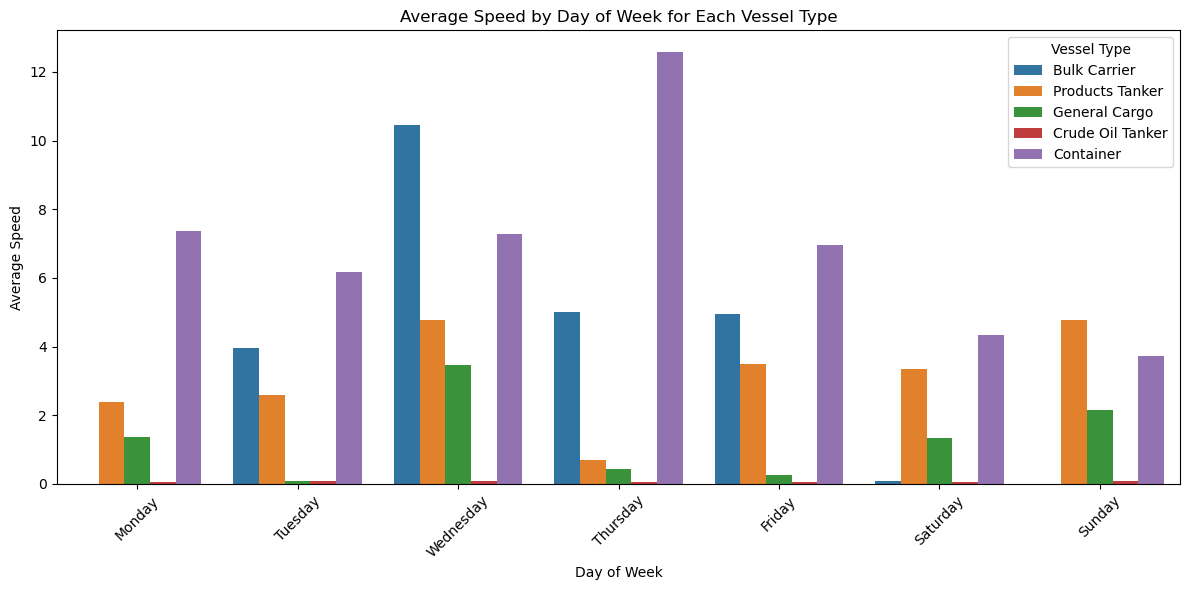

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_speed_by_day, x='dayofweek', y='speed', hue='vessel_type')

plt.title('Average Speed by Day of Week for Each Vessel Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Speed')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Average Speed by Day of Week for Each Vessel Type illustrates how the average speed of different vessel types changes throughout the week

6.3. course vs time vs vessel type

6.3.1. how the speed vary with time under vessel type

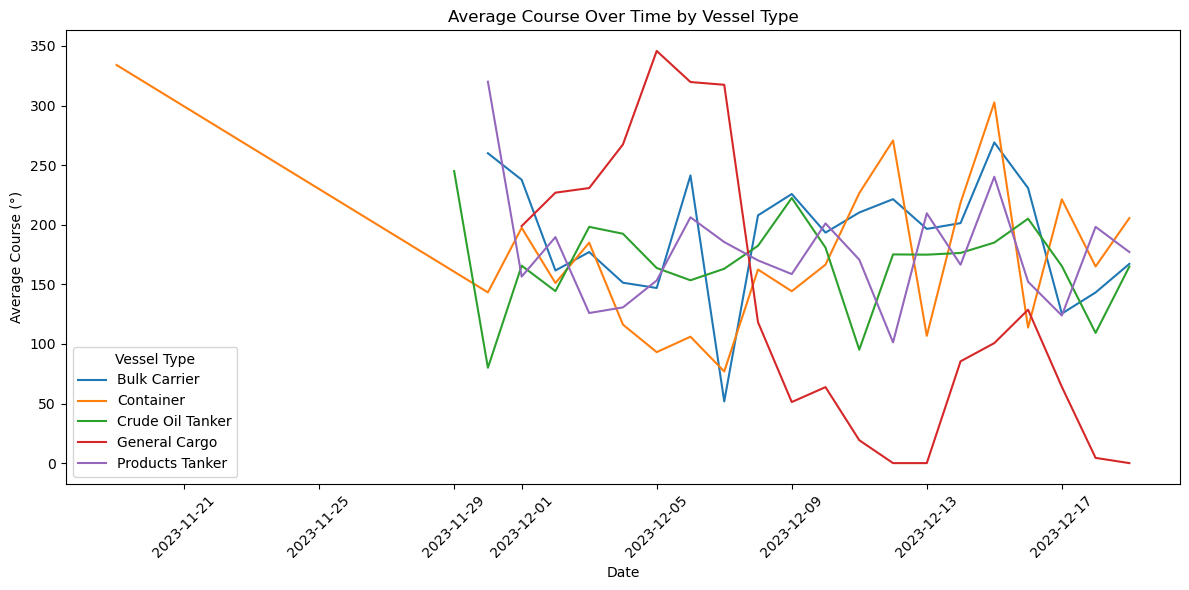

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure timestamp is datetime
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])

# Extract date for daily aggregation
df['date'] = df['receivedtimestamp'].dt.date

# Compute average course per vessel type per day
avg_course = df.groupby(['vessel_type', 'date'])['course'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_course, x='date', y='course', hue='vessel_type')

plt.title('Average Course Over Time by Vessel Type')
plt.xlabel('Date')
plt.ylabel('Average Course (°)')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6.3.2. average speed for each day of the week

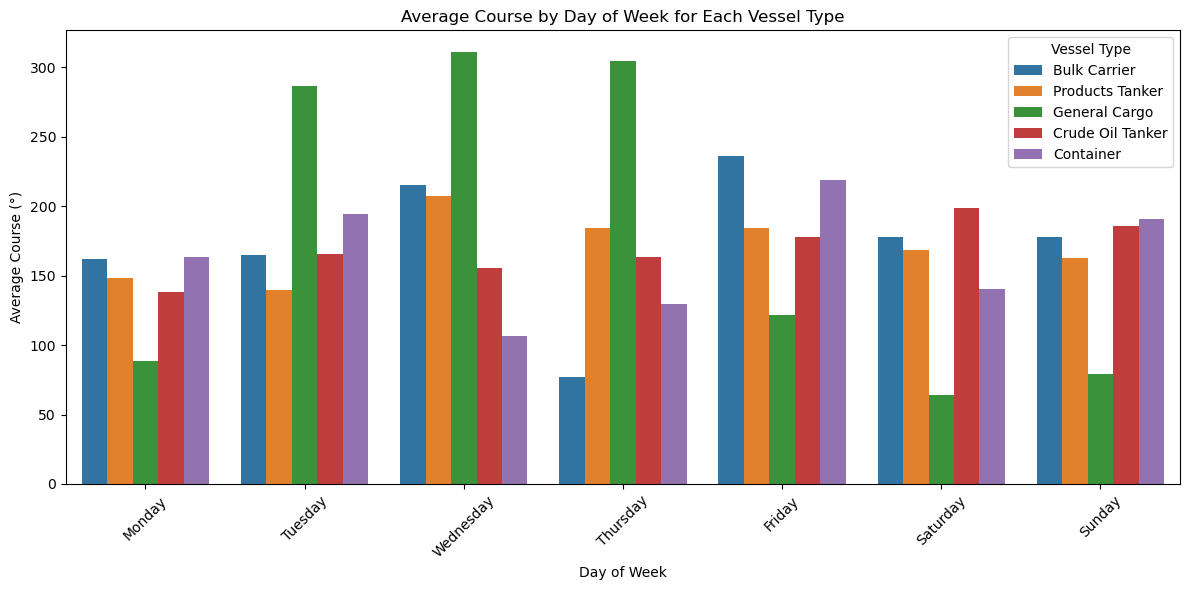

In [36]:
# Ensure timestamp is in datetime format
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])

# Create a new column for day name (e.g., Monday, Tuesday, ...)
df['dayofweek'] = df['receivedtimestamp'].dt.day_name()

# Group and calculate mean course
avg_course_by_day = df.groupby(['vessel_type', 'dayofweek'])['course'].mean().reset_index()

# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to categorical to enforce order
avg_course_by_day['dayofweek'] = pd.Categorical(avg_course_by_day['dayofweek'], categories=day_order, ordered=True)

# Sort the DataFrame
avg_course_by_day = avg_course_by_day.sort_values('dayofweek')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_course_by_day, x='dayofweek', y='course', hue='vessel_type')

plt.title('Average Course by Day of Week for Each Vessel Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Course (°)')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Average Course by Day of Week for Each Vessel Type shows how the average directional heading (course in degrees) varies across the week for different types of vessels

6.3.3. average distance gap of each day of the week 

/tmp/ipykernel_6662/1214047659.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['lat_prev'] = df_sorted.groupby('mmsi')['latitude'].shift(1)
/tmp/ipykernel_6662/1214047659.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['lon_prev'] = df_sorted.groupby('mmsi')['longitude'].shift(1)


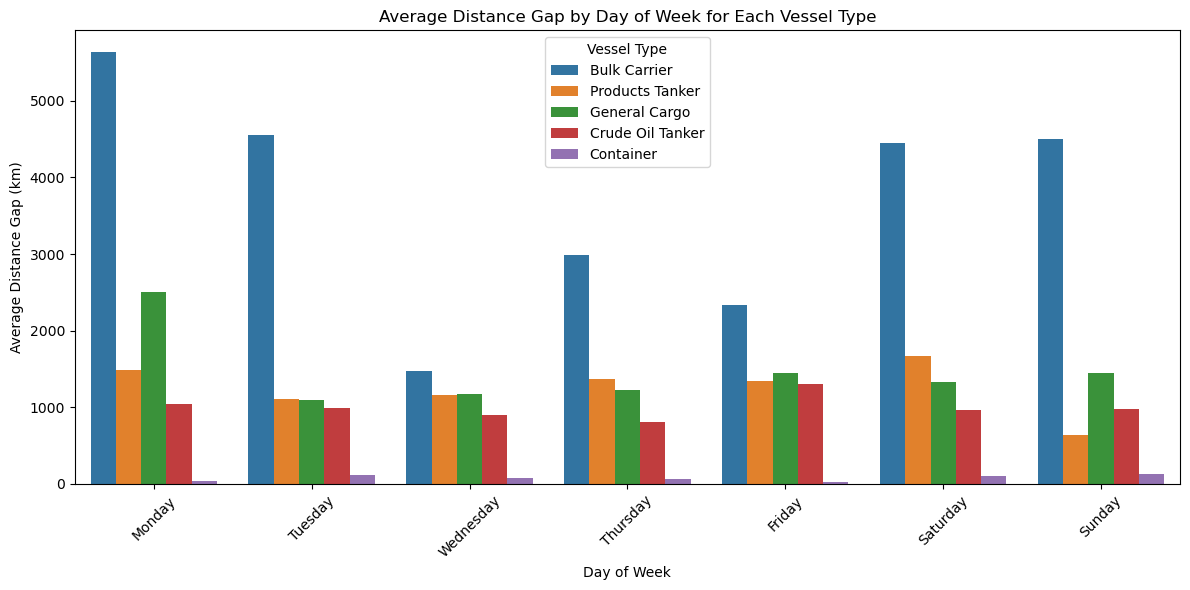

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Ensure datetime and compute day name ---
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df['dayofweek'] = df['receivedtimestamp'].dt.day_name()

# --- Step 2: Sort and calculate distance gaps using Haversine ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Sort and shift for previous lat/lon
df_sorted = df.sort_values(by=['mmsi', 'receivedtimestamp'])
df_sorted['lat_prev'] = df_sorted.groupby('mmsi')['latitude'].shift(1)
df_sorted['lon_prev'] = df_sorted.groupby('mmsi')['longitude'].shift(1)

# Compute distance gap
df_sorted['distgap'] = haversine(
    df_sorted['latitude'], df_sorted['longitude'],
    df_sorted['lat_prev'], df_sorted['lon_prev']
)

# --- Step 3: Group by vessel_type and dayofweek ---
avg_distgap_by_day = (
    df_sorted.dropna(subset=['distgap'])  # remove NaNs from shift
    .groupby(['vessel_type', 'dayofweek'])['distgap']
    .mean()
    .reset_index()
)

# --- Step 4: Order days of week ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_distgap_by_day['dayofweek'] = pd.Categorical(avg_distgap_by_day['dayofweek'], categories=day_order, ordered=True)
avg_distgap_by_day = avg_distgap_by_day.sort_values('dayofweek')

# --- Step 5: Plot ---
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_distgap_by_day, x='dayofweek', y='distgap', hue='vessel_type')

plt.title('Average Distance Gap by Day of Week for Each Vessel Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Distance Gap (km)')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* "Average Distance Gap by Day of Week for Each Vessel Type" illustrates how the average distance between consecutive recorded positions (in kilometers) varies across the week for different vessel types.

6.3.4. average time gap each day of the week

/tmp/ipykernel_6662/729421470.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sorted['timegap'] = df_sorted.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()


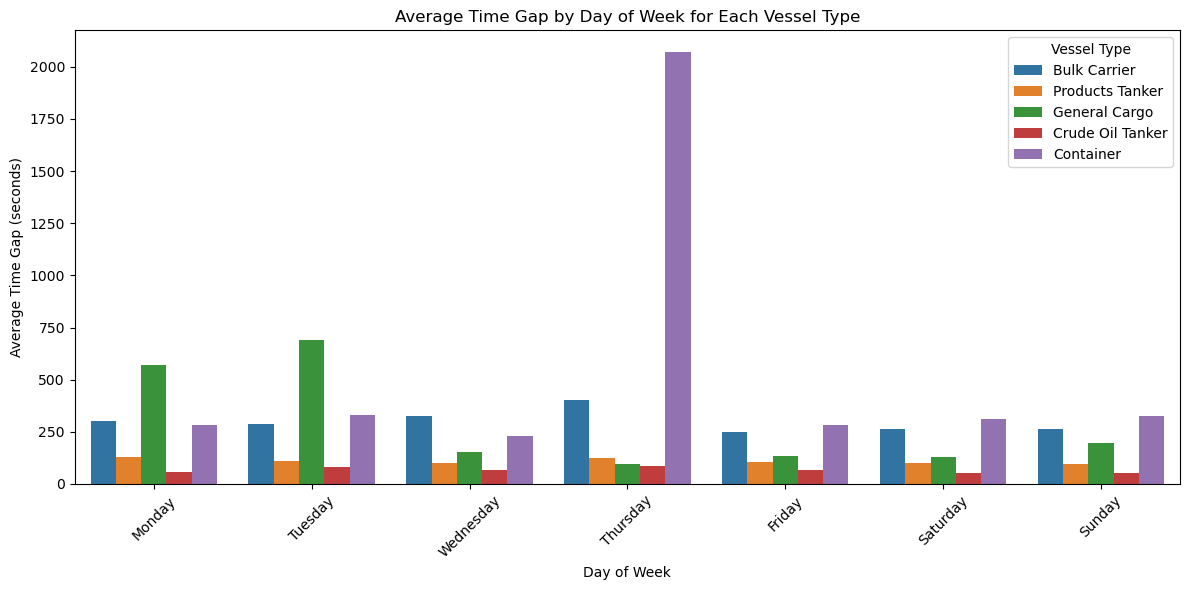

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Ensure timestamp and day of week ---
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df['dayofweek'] = df['receivedtimestamp'].dt.day_name()

# --- Step 2: Sort and calculate time gap ---
df_sorted = df.sort_values(by=['mmsi', 'receivedtimestamp'])
df_sorted['timegap'] = df_sorted.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()

# --- Step 3: Group by vessel_type and dayofweek and calculate mean ---
avg_timegap_by_day = (
    df_sorted.dropna(subset=['timegap'])  # remove NaNs from first diffs
    .groupby(['vessel_type', 'dayofweek'])['timegap']
    .mean()
    .reset_index()
)

# --- Step 4: Order days of week ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_timegap_by_day['dayofweek'] = pd.Categorical(avg_timegap_by_day['dayofweek'], categories=day_order, ordered=True)
avg_timegap_by_day = avg_timegap_by_day.sort_values('dayofweek')

# --- Step 5: Plot ---
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_timegap_by_day, x='dayofweek', y='timegap', hue='vessel_type')

plt.title('Average Time Gap by Day of Week for Each Vessel Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Time Gap (seconds)')
plt.legend(title='Vessel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*  "Average Time Gap by Day of Week for Each Vessel Type" shows how the average time interval (in seconds) between consecutive recorded positions varies across the week for different vessel types.

7. statistical tests 

7.1. vessel types behave significantly differently in terms of speed

In [42]:
from scipy.stats import kruskal

# Group speed values by vessel type
speed_groups = [group['speed'].values for name, group in df.groupby('vessel_type')]

# Apply Kruskal–Wallis H-test on speed
stat_speed, p_speed = kruskal(*speed_groups)

print(f"Kruskal–Wallis test on Speed:")
print(f"Statistic = {stat_speed:.3f}, p-value = {p_speed:.5f}")

if p_speed < 0.05:
    print("→ Significant difference in speed between vessel types.")
else:
    print("→ No significant difference in speed between vessel types.")


Kruskal–Wallis test on Speed:
Statistic = 11335.061, p-value = 0.00000
→ Significant difference in speed between vessel types.


In [43]:
# identify which vessel types differ significantly.
from scipy.stats import mannwhitneyu
from itertools import combinations
import pandas as pd
import statsmodels.stats.multitest as smm

# Step 1: Get all vessel type combinations
vessel_types = df['vessel_type'].unique()
pairs = list(combinations(vessel_types, 2))

# Step 2: Perform Mann-Whitney U test for each pair
results = []
for v1, v2 in pairs:
    data1 = df[df['vessel_type'] == v1]['speed']
    data2 = df[df['vessel_type'] == v2]['speed']
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    results.append((v1, v2, p))

# Step 3: Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'p_value'])

# Step 4: Apply Bonferroni correction
reject, p_adj, _, _ = smm.multipletests(results_df['p_value'], method='bonferroni')
results_df['p_adj'] = p_adj
results_df['Significant'] = reject

# Step 5: Show only significant comparisons
significant_results = results_df[results_df['Significant'] == True]
print("Significant pairwise differences in speed by vessel type:")
print(significant_results)


Significant pairwise differences in speed by vessel type:
            Group 1           Group 2       p_value         p_adj  Significant
0      Bulk Carrier         Container  0.000000e+00  0.000000e+00         True
2      Bulk Carrier     General Cargo  1.781361e-23  1.781361e-22         True
3      Bulk Carrier   Products Tanker  3.821241e-79  3.821241e-78         True
4         Container  Crude Oil Tanker  0.000000e+00  0.000000e+00         True
5         Container     General Cargo  0.000000e+00  0.000000e+00         True
6         Container   Products Tanker  0.000000e+00  0.000000e+00         True
7  Crude Oil Tanker     General Cargo  9.321004e-32  9.321004e-31         True
8  Crude Oil Tanker   Products Tanker  0.000000e+00  0.000000e+00         True
9     General Cargo   Products Tanker  0.000000e+00  0.000000e+00         True


* Every vessel type differs significantly in speed from every other type

7.2. vessel types behave significantly differently in terms of course

In [44]:
from scipy.stats import kruskal

# Group course values by vessel type
course_groups = [group['course'].values for name, group in df.groupby('vessel_type')]

# Apply Kruskal–Wallis H-test on course
stat_course, p_course = kruskal(*course_groups)

print(f"Kruskal–Wallis test on Course:")
print(f"Statistic = {stat_course:.3f}, p-value = {p_course:.5f}")

if p_course < 0.05:
    print("→ Significant difference in course between vessel types.")
else:
    print("→ No significant difference in course between vessel types.")


Kruskal–Wallis test on Course:
Statistic = 53.808, p-value = 0.00000
→ Significant difference in course between vessel types.


In [45]:
from scipy.stats import mannwhitneyu
from itertools import combinations
import pandas as pd
import statsmodels.stats.multitest as smm

# Step 1: Get all vessel type combinations
vessel_types = df['vessel_type'].unique()
pairs = list(combinations(vessel_types, 2))

# Step 2: Perform Mann-Whitney U test for each pair (using 'course')
results = []
for v1, v2 in pairs:
    data1 = df[df['vessel_type'] == v1]['course']
    data2 = df[df['vessel_type'] == v2]['course']
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    results.append((v1, v2, p))

# Step 3: Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'p_value'])

# Step 4: Apply Bonferroni correction
reject, p_adj, _, _ = smm.multipletests(results_df['p_value'], method='bonferroni')
results_df['p_adj'] = p_adj
results_df['Significant'] = reject

# Step 5: Show only significant comparisons
significant_results = results_df[results_df['Significant'] == True]
print("Significant pairwise differences in course by vessel type:")
print(significant_results)


Significant pairwise differences in course by vessel type:
            Group 1           Group 2       p_value         p_adj  Significant
0      Bulk Carrier         Container  5.793684e-08  5.793684e-07         True
1      Bulk Carrier  Crude Oil Tanker  5.444368e-15  5.444368e-14         True
3      Bulk Carrier   Products Tanker  9.652656e-09  9.652656e-08         True
5         Container     General Cargo  2.209220e-05  2.209220e-04         True
8  Crude Oil Tanker   Products Tanker  4.098469e-11  4.098469e-10         True
9     General Cargo   Products Tanker  5.350736e-06  5.350736e-05         True


* Every vessel type differs significantly in direction from every other type

7.3. vessel types behave significantly differently in terms of time gap

In [46]:
from scipy.stats import kruskal

# Make sure timegap is calculated
df = df.sort_values(by=['mmsi', 'receivedtimestamp'])
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df['timegap'] = df.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()

# Drop NaNs from first diffs
df_timegap = df.dropna(subset=['timegap'])

# Group timegap values by vessel type
timegap_groups = [group['timegap'].values for name, group in df_timegap.groupby('vessel_type')]

# Apply Kruskal–Wallis H-test on timegap
stat_timegap, p_timegap = kruskal(*timegap_groups)

print(f"Kruskal–Wallis test on Timegap:")
print(f"Statistic = {stat_timegap:.3f}, p-value = {p_timegap:.5f}")

if p_timegap < 0.05:
    print("→ Significant difference in timegap between vessel types.")
else:
    print("→ No significant difference in timegap between vessel types.")


Kruskal–Wallis test on Timegap:
Statistic = 14514.273, p-value = 0.00000
→ Significant difference in timegap between vessel types.


/tmp/ipykernel_6662/728526617.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['timegap'] = df.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()


In [47]:
from scipy.stats import mannwhitneyu
from itertools import combinations
import pandas as pd
import statsmodels.stats.multitest as smm

# Ensure timegap is calculated
df = df.sort_values(by=['mmsi', 'receivedtimestamp'])
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df['timegap'] = df.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()

# Drop rows with missing timegap
df_timegap = df.dropna(subset=['timegap'])

# Step 1: Get all vessel type combinations
vessel_types = df_timegap['vessel_type'].unique()
pairs = list(combinations(vessel_types, 2))

# Step 2: Perform Mann-Whitney U test for each pair (using 'timegap')
results = []
for v1, v2 in pairs:
    data1 = df_timegap[df_timegap['vessel_type'] == v1]['timegap']
    data2 = df_timegap[df_timegap['vessel_type'] == v2]['timegap']
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    results.append((v1, v2, p))

# Step 3: Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'p_value'])

# Step 4: Apply Bonferroni correction
reject, p_adj, _, _ = smm.multipletests(results_df['p_value'], method='bonferroni')
results_df['p_adj'] = p_adj
results_df['Significant'] = reject

# Step 5: Show only significant comparisons
significant_results = results_df[results_df['Significant'] == True]
print("Significant pairwise differences in timegap by vessel type:")
print(significant_results)


Significant pairwise differences in timegap by vessel type:
            Group 1           Group 2        p_value          p_adj  \
0      Bulk Carrier  Crude Oil Tanker   0.000000e+00   0.000000e+00   
2      Bulk Carrier   Products Tanker  3.948910e-303  3.948910e-302   
3      Bulk Carrier     General Cargo  4.306108e-242  4.306108e-241   
4  Crude Oil Tanker         Container   0.000000e+00   0.000000e+00   
5  Crude Oil Tanker   Products Tanker   0.000000e+00   0.000000e+00   
6  Crude Oil Tanker     General Cargo   0.000000e+00   0.000000e+00   
7         Container   Products Tanker  1.263530e-256  1.263530e-255   
8         Container     General Cargo  7.501762e-227  7.501762e-226   
9   Products Tanker     General Cargo   8.077864e-19   8.077864e-18   

   Significant  
0         True  
2         True  
3         True  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True  


/tmp/ipykernel_6662/2617160493.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['timegap'] = df.groupby('mmsi')['receivedtimestamp'].diff().dt.total_seconds()


7.4. vessel types behave significantly differently in terms of distance gap

In [48]:
from scipy.stats import kruskal
import numpy as np

# Ensure datetime format and sort
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df = df.sort_values(by=['mmsi', 'receivedtimestamp'])

# Haversine formula to calculate distance in kilometers
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distgap between consecutive points
df['lat_prev'] = df.groupby('mmsi')['latitude'].shift(1)
df['lon_prev'] = df.groupby('mmsi')['longitude'].shift(1)
df['distgap'] = haversine(df['latitude'], df['longitude'], df['lat_prev'], df['lon_prev'])

# Drop NaNs from first diffs
df_distgap = df.dropna(subset=['distgap'])

# Group distgap values by vessel type
distgap_groups = [group['distgap'].values for name, group in df_distgap.groupby('vessel_type')]

# Apply Kruskal–Wallis H-test on distgap
stat_distgap, p_distgap = kruskal(*distgap_groups)

print(f"Kruskal–Wallis test on Distgap:")
print(f"Statistic = {stat_distgap:.3f}, p-value = {p_distgap:.5f}")

if p_distgap < 0.05:
    print("→ Significant difference in distgap between vessel types.")
else:
    print("→ No significant difference in distgap between vessel types.")


Kruskal–Wallis test on Distgap:
Statistic = 11588.871, p-value = 0.00000
→ Significant difference in distgap between vessel types.


/tmp/ipykernel_6662/1697038484.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['lat_prev'] = df.groupby('mmsi')['latitude'].shift(1)
/tmp/ipykernel_6662/1697038484.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['lon_prev'] = df.groupby('mmsi')['longitude'].shift(1)


In [49]:
from scipy.stats import mannwhitneyu
from itertools import combinations
import pandas as pd
import numpy as np
import statsmodels.stats.multitest as smm

# Ensure datetime and sorting
df['receivedtimestamp'] = pd.to_datetime(df['receivedtimestamp'])
df = df.sort_values(by=['mmsi', 'receivedtimestamp'])

# Calculate distgap using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['lat_prev'] = df.groupby('mmsi')['latitude'].shift(1)
df['lon_prev'] = df.groupby('mmsi')['longitude'].shift(1)
df['distgap'] = haversine(df['latitude'], df['longitude'], df['lat_prev'], df['lon_prev'])

# Drop rows with missing distgap
df_distgap = df.dropna(subset=['distgap'])

# Step 1: Get all vessel type combinations
vessel_types = df_distgap['vessel_type'].unique()
pairs = list(combinations(vessel_types, 2))

# Step 2: Perform Mann-Whitney U test for each pair (using 'distgap')
results = []
for v1, v2 in pairs:
    data1 = df_distgap[df_distgap['vessel_type'] == v1]['distgap']
    data2 = df_distgap[df_distgap['vessel_type'] == v2]['distgap']
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    results.append((v1, v2, p))

# Step 3: Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'p_value'])

# Step 4: Apply Bonferroni correction
reject, p_adj, _, _ = smm.multipletests(results_df['p_value'], method='bonferroni')
results_df['p_adj'] = p_adj
results_df['Significant'] = reject

# Step 5: Show only significant comparisons
significant_results = results_df[results_df['Significant'] == True]
print("Significant pairwise differences in distgap by vessel type:")
print(significant_results)


Significant pairwise differences in distgap by vessel type:
            Group 1           Group 2        p_value          p_adj  \
0      Bulk Carrier  Crude Oil Tanker   0.000000e+00   0.000000e+00   
2      Bulk Carrier   Products Tanker  1.504281e-114  1.504281e-113   
3      Bulk Carrier     General Cargo  7.290445e-168  7.290445e-167   
4  Crude Oil Tanker         Container   0.000000e+00   0.000000e+00   
5  Crude Oil Tanker   Products Tanker   0.000000e+00   0.000000e+00   
6  Crude Oil Tanker     General Cargo   0.000000e+00   0.000000e+00   
7         Container   Products Tanker   0.000000e+00   0.000000e+00   
8         Container     General Cargo  4.164732e-150  4.164732e-149   
9   Products Tanker     General Cargo   1.296926e-32   1.296926e-31   

   Significant  
0         True  
2         True  
3         True  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True  


/tmp/ipykernel_6662/1647767803.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['lat_prev'] = df.groupby('mmsi')['latitude'].shift(1)
/tmp/ipykernel_6662/1647767803.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['lon_prev'] = df.groupby('mmsi')['longitude'].shift(1)
